In [205]:
from sklearn.datasets import fetch_20newsgroups
newsData = fetch_20newsgroups()
newsData.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [206]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
print('Length train: '+ str(len(twenty_train.data)))
print('Length test: '+ str(len(twenty_test.data)))

Length train: 11314
Length test: 7532


In [207]:
for i in range(5):
    print('NEW DATA')
    print(twenty_train.data[i]) 
print(twenty_train.target_names[twenty_train.target[0]])

NEW DATA
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





NEW DATA
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting

In [208]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
matrix = count_vectorizer.fit_transform(twenty_train.data)

In [209]:
print('Matrix shape: ' + str(matrix.shape))
print(matrix[0])

Matrix shape: (11314, 130107)
  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1


In [210]:
def get_words_distribution_from_matrix(alpha, feature_matrix):
    # Alpha es para suavizar y evitar la probabilidad cero. Normalmente 1
    # Es como agregar un mail con todas las palabras
    words_distribution_un = feature_matrix.sum(axis=0) + alpha
    words_distribution = words_distribution_un/(words_distribution_un.sum() + alpha*feature_matrix.shape[1])
    return words_distribution * 500

In [211]:
def plot_bar_chart(P, vocabulary = None, title='title'):
    N = len(P)
    plt.figure(figsize=(20, 5)) # Tamaño del gráfico
    indexes = list(range(1, len(P) + 1))
    plt.bar(indexes, P, width=0.75, color='b') # Grafico
    plt.title(title)

    # Definición de indices
    if not vocabulary:
        string_indexes = [str(i) for i in indexes]
    else:
        string_indexes = [vocabulary[i-1] for i in indexes]
    plt.xlim([0,N+1])
    plt.xticks(indexes, string_indexes) 
    plt.xticks(rotation=60)
    plt.show()

In [212]:
print(twenty_train.target_names[7])

rec.autos


In [213]:
import numpy as np

nptarget = np.array(twenty_train.target)
nptargetnames = np.array(twenty_train.target_names)

labels = np.asarray(nptargetnames[nptarget] =='rec.sport.hockey')
#print(np.count_nonzero(labels))

atheism = matrix[labels,:]

# words_distribution_un = feature_matrix.sum(axis=0) + alpha
#     words_distribution = words_distribution_un/(words_distribution_un.sum() + alpha*feature_matrix.shape[1])

atheism_words_distribution = get_words_distribution_from_matrix(20, atheism)


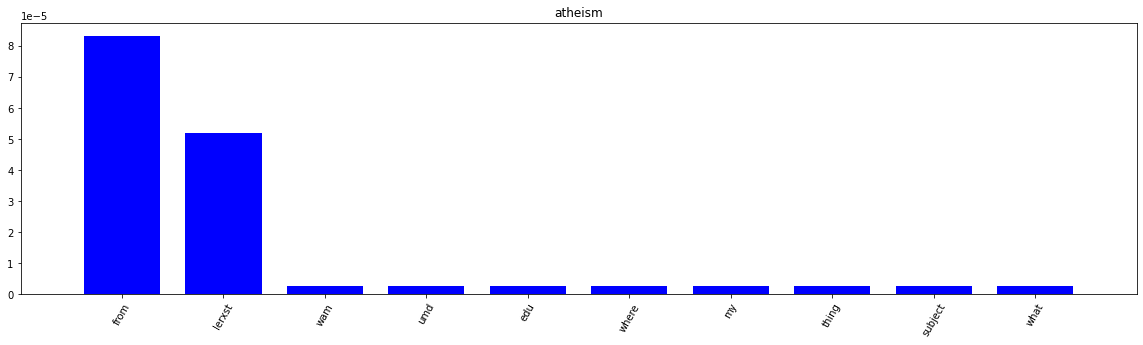

In [214]:
from matplotlib import pyplot as plt
# Importo el paquete para graficar
from matplotlib import pyplot as plt
N = 10
plot_bar_chart(np.array(atheism_words)[0][:N],
                vocabulary = list(count_vectorizer.vocabulary_.keys()),
               title='atheism')

In [217]:
# Veamos si el primer email es SPAM o no
# El primer mail corresponde a la primer fila de la matriz
row = matrix[0,:]
print('Primer email codificado:')
non_zero_row = row.nonzero()
#print('Elementos distintos de cero:',non_zero_row[1])
print(matrix[non_zero_row])
#print('Producto, no es necesario [P(Y) = P(SPAM) = P(HAM)] por que es para ambos casos igual. Lo mismo el denominador')
#print(np.power(atheism_words_distribution[non_zero_row], matrix[non_zero_row]).prod())
# print(np.power(ham_words_distribution[non_zero_row], feature_matrix[non_zero_row]).prod())
print('Log likelihood')
print(np.log(atheism_words_distribution[non_zero_row])*matrix[non_zero_row].T)
# print(np.log(ham_words_distribution[non_zero_row])*feature_matrix[non_zero_row].T)

Primer email codificado:
[[3 2 2 2 2 2 1 1 1 1 5 3 5 1 1 1 1 1 1 3 1 1 1 1 1 4 1 2 2 1 1 1 1 1 2 1
  6 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]]
Log likelihood
[[-495.23842569]]


In [231]:
(1500/140000) ** (89*1.1)

1.3595637254713202e-193